In [2]:
import pandas as pd
import numpy as np

In [ ]:
## Data preprocessing

In [7]:
# Load the file, treating '?' as missing values
df = pd.read_csv("/Users/monicaekstein/Downloads/heart+disease/processed.cleveland.data", header=None, na_values="?")

In [9]:
# Assign column names
df.columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Inspect the data
df.head()        
df.info()        
df.describe()    
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [14]:
# Handle missing values
for col in ['ca', 'thal']:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

# Convert categorical columnns to category type
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Binarize the target variable
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)  # 0 = no disease, 1 = disease
df['target'] = df['target'].astype('category')

# Normalize numeric features
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [16]:
# Train test split
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
## EDA

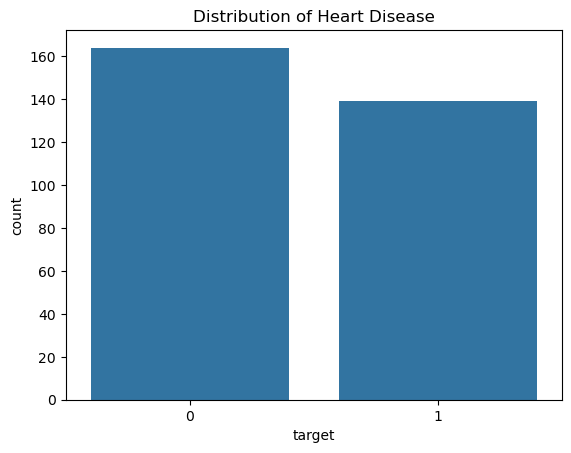

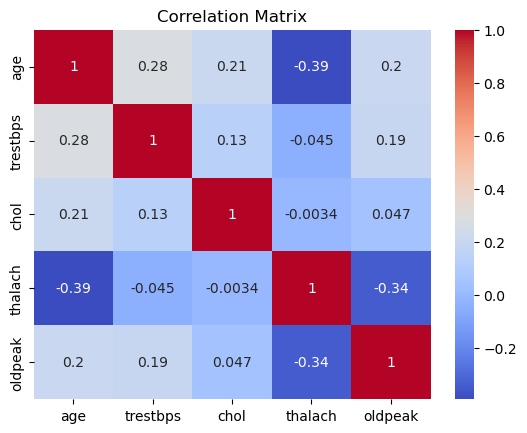

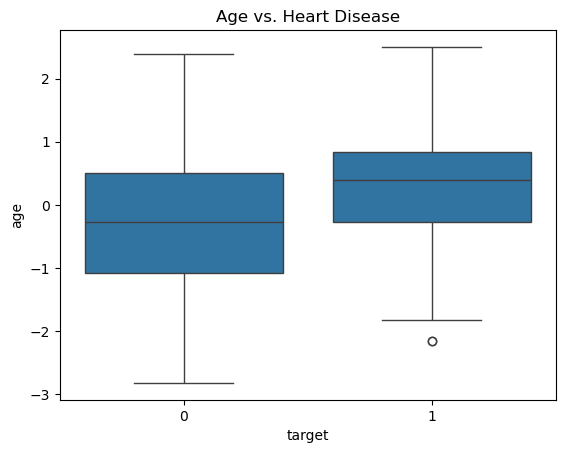

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target class distribution
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot or boxplots by target
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs. Heart Disease")
plt.show()

In [ ]:
## Feature selection

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# List of numeric columns to scale
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Scale numeric features to [0, 1] for chi2 compatibility
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Use chi-squared test to select top 10 features
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X_encoded, y)

# Get top feature names
selected_features = X_encoded.columns[selector.get_support()]
print("Top features selected by chi2:")
print(selected_features)

Top features selected by chi2:
Index(['cp_3.0', 'cp_4.0', 'exang_0.0', 'exang_1.0', 'slope_1.0', 'slope_2.0',
       'ca_0.0', 'ca_2.0', 'thal_3.0', 'thal_7.0'],
      dtype='object')


In [3]:
import os
os.path.abspath("ADS503_FinalProject.ipynb")
git init
git add ADS503_FinalProject.ipynb
git commit -m "Initial commit for ADS503 final project"
git remote add origin https://github.com/your-username/your-repo.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (2737959470.py, line 3)